In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from datetime import timedelta

In [2]:
mid_night = datetime.datetime.strptime('23:59:59', '%H:%M:%S').time()
noon = datetime.datetime.strptime('12:00:00', '%H:%M:%S').time()
def str_to_time(x, start_time):
    if start_time.time() > noon: 
        if noon < datetime.datetime.strptime(x[:-4], '%H:%M:%S').time() < mid_night:
            return datetime.datetime.strptime(str(start_time.date()) + " " + x[:-4], '%Y-%m-%d %H:%M:%S')
        else:
            return datetime.datetime.strptime(str(start_time.date()) + " " + x[:-4], '%Y-%m-%d %H:%M:%S') + timedelta(days=1)
    else:
        return datetime.datetime.strptime(str(start_time.date()) + " " + x[:-4], '%Y-%m-%d %H:%M:%S')

In [3]:
def round_time(x):
    timestamp = datetime.datetime.strptime(x[0:10] + " " + x[11:-6], '%Y-%m-%d %H:%M:%S.%f')
    if timestamp.time().microsecond >= 500000:
        return datetime.datetime.strptime(x[0:10] + " " + x[11:-10], '%Y-%m-%d %H:%M:%S') + timedelta(seconds=1)
    else:
        return datetime.datetime.strptime(x[0:10] + " " + x[11:-10], '%Y-%m-%d %H:%M:%S')
    
    

In [4]:
rootdir = '../Sleep Data/'
sleep_profiles = []
xethru_recordings = []

for subdir, dirs, files in os.walk(rootdir):
    subdir_split = subdir.split('/')
    subdir_und = subdir_split[-1].split('_')
    
    current_xethru_recording = pd.DataFrame(columns=["time", "frame_count", "state", "rpm", "object_distance", 
                                        "signal_quality", "movement_slow", "movement_fast"])
    
    isFirstFile = True
    
    CSVCount = 0
            
    for file in files:        
        if (file == 'Sleep profile.txt' ) & ('PSG_analysis_manual' in subdir_split):
            start_time = ''
            with open(os.path.join(subdir, file)) as f:
                head = [next(f) for x in range(2)]
                start_time = datetime.datetime.strptime(head[1][12:-1], '%d.%m.%Y %H:%M:%S')
                
            sleep_profile = pd.read_csv(os.path.join(subdir, file), sep=";", skiprows=7, header=None)
            sleep_profile.columns = ["time", "stage"]
            sleep_profile['time'] = sleep_profile['time'].apply(lambda x: str_to_time(x, start_time))
            sleep_profiles.append(sleep_profile)
        
        file_split = file.split('_')
        
        if 'xethru' in file_split and 'sleep' in file_split and 'nattbord' in subdir_und:
            numCSVs = len(glob.glob1(subdir, "*.csv"))
            
            CSVCount = CSVCount + 1
            
            xethru_recording = pd.read_csv(os.path.join(subdir, file), sep=";", skiprows=1, header=None)

            xethru_recording.columns = ["time", "frame_count", "state", "rpm", "object_distance", 
                                        "signal_quality", "movement_slow", "movement_fast"]
            
            xethru_recording['time'] = xethru_recording['time'].apply(lambda x: round_time(x))
            
            start_timestamp = sleep_profiles[-1]['time'].iloc[0]
                                               
            current_xethru_recording = current_xethru_recording.append(xethru_recording)
        
            if numCSVs == CSVCount:
                start_time = current_xethru_recording['time'].iloc[0]
                end_time = current_xethru_recording['time'].iloc[-1]
                
                sleep_profiles[-1] = sleep_profiles[-1][sleep_profiles[-1]['time'].map(lambda x: start_time <= x <= end_time)]
                                    
                        
            isFirstFile = False            
    
    if len(current_xethru_recording) > 0 and 'nattbord' in subdir_und:
        for x in range(1, current_xethru_recording.shape[0]):
            if (current_xethru_recording['time'].iloc[x]) != (current_xethru_recording['time'].iloc[x-1] + timedelta(seconds=1)):
                time_adjusted = current_xethru_recording['time'].iloc[x-1] + timedelta(seconds=1)
                current_xethru_recording['time'].iloc[x] = time_adjusted

        start_timestamp = sleep_profiles[-1]['time'].iloc[0]
        end_timestamp = sleep_profiles[-1]['time'].iloc[-1] + timedelta(seconds=29)
        current_xethru_recording = current_xethru_recording[current_xethru_recording['time'].map(lambda x: start_timestamp <= x <= end_timestamp)]        
        xethru_recordings.append(current_xethru_recording)

In [5]:
all_xethru_recordings = pd.concat(xethru_recordings, ignore_index=True)
all_sleep_profiles = pd.concat(sleep_profiles, ignore_index=True)

In [6]:
labels = np.array(all_sleep_profiles['stage'].to_numpy())

In [7]:
filtered_recordings = all_xethru_recordings.filter(['rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality'])

In [8]:
avgFrame = []
j = 0
for i in range(0,len(all_xethru_recordings),30):
    row = []
    time = all_xethru_recordings["time"].iloc[i]
    features = (filtered_recordings.iloc[i: i + 30]).mean().to_frame().transpose().values[0]
    label = all_sleep_profiles['stage'].iloc[j]
    row.append(time)
    row.extend(features)
    row.append(label)
    avgFrame.append(row)
    print(j)
    j += 1

3
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36

In [9]:
df_ = pd.DataFrame(avgFrame, columns=['time', 'rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality', 'label'])

In [10]:
df_ = df_[df_['label'].map(lambda x: (x != ' A') and (x != ' Artefact'))]

In [11]:
def map_stage(stage):
    if stage == ' Wake':
        return 0
    elif stage == ' N1':
        return 1
    elif stage == ' N2':
        return 2
    elif stage == ' N3':
        return 3
    elif stage == ' N4':
        return 4
    elif stage == ' REM':
        return 5

In [12]:
df_['label'] = df_['label'].apply(lambda x: map_stage(x))

In [13]:
def map_label_sw(label):
    if (label == 1) or (label == 2) or (label == 3) or (label == 4) or (label == 5):
        return 1
    else:
        return 0

In [14]:
def map_label_ldr(label):
    if (label == 1) or (label == 2):
        return 0
    elif (label == 3) or (label == 4):
        return 1
    elif label == 5:
        return 2
    elif label == 0:
        return 3

In [15]:
def map_label_nr(label):
    if (label == 1) or (label == 2) or (label == 3) or (label == 4):
        return 0
    elif label == 5:
        return 1
    elif label == 0:
        return 2

In [4]:
df_['label'] = df_['label'].apply(lambda x: map_label_nr(x))

In [46]:
# df_['label'] = df_['label'].apply(lambda x: map_label_sw(x))

In [16]:
df_ = pd.read_csv('out.csv')

In [17]:
x_ = df_.filter(['rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality'], axis=1)
y_ = df_['label']

In [148]:
dataFrame = []
j = 0
for i in range(0,len(all_xethru_recordings),30):
    row = []
    time = all_xethru_recordings["time"].iloc[i]
    rpm_var =  np.var(np.stack(filtered_recordings['rpm'].iloc[i: i + 30]))
    rpm_mean = np.mean(filtered_recordings['rpm'].iloc[i: i + 30])
    mov_fast_mean = np.mean(filtered_recordings['movement_fast'].iloc[i: i + 30])
    mov_slow_mean = np.mean(filtered_recordings['movement_slow'].iloc[i: i + 30])
    object_distance_mean = np.mean(filtered_recordings['object_distance'].iloc[i: i + 30])
    label = all_sleep_profiles['stage'].iloc[j]
    row.append(time)
    row.append(rpm_var)
    row.append(rpm_mean)
    row.append(mov_fast_mean)
    row.append(mov_slow_mean)
    row.append(object_distance_mean)
    row.append(label)
    dataFrame.append(row)
    print(j)
    j += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192


3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869


5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649


7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343


8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114


10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
1067

11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
1206

13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
1357

14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
1499

16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
1650

17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
1789

19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
1928

20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
2077

22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22156
22157
22158
22159
22160
22161
22162
22163
22164
22165
22166
22167
22168
22169
22170
22171
22172
22173
22174
22175
22176
22177
22178
22179
22180
22181
22182
22183
22184
22185
22186
22187
22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
2228

23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23693
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
2378

25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
2527

26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
2665

27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
2812

29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
2961

30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
3104

32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
32330
32331
32332
32333
32334
32335
32336
32337
32338
32339
32340
32341
32342
32343
32344
32345
32346
32347
32348
32349
32350
32351
32352
32353
32354
32355
32356
32357
32358
32359
32360
32361
32362
32363
32364
32365
32366
32367
32368
32369
32370
32371
32372
32373
32374
32375
32376
32377
32378
32379
32380
32381
32382
32383
32384
32385
32386
32387
32388
32389
32390
32391
32392
32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
32404
32405
32406
32407
32408
32409
32410
32411
32412
32413
32414
3241

33756
33757
33758
33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
3392

35133
35134
35135
35136
35137
35138
35139
35140
35141
35142
35143
35144
35145
35146
35147
35148
35149
35150
35151
35152
35153
35154
35155
35156
35157
35158
35159
35160
35161
35162
35163
35164
35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
3529

36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
3675

38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
3817

39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
3963

In [209]:
df = pd.DataFrame(dataFrame, columns=['time', 'rpm_var', 'rpm_mean', 'mov_fast_mean', 'mov_slow_mean', 'object_distance_mean', 'label'])

In [210]:
df = df[df['label'].map(lambda x: (x != ' A') and (x != ' Artefact'))]

In [211]:
df['label'] = df['label'].apply(lambda x: map_stage(x))

In [212]:
df.dtypes

time                    datetime64[ns]
rpm_var                        float64
rpm_mean                       float64
mov_fast_mean                  float64
mov_slow_mean                  float64
object_distance_mean           float64
label                            int64
dtype: object

In [153]:
# df['label'] = df['label'].apply(lambda x: map_label_nr(x))

In [213]:
x = df.filter(['rpm_var', 'rpm_mean', 'mov_fast_mean', 'mov_slow_mean'], axis=1)
y = df['label']

In [133]:
xethru_numpy = np.array(all_xethru_recordings.filter(['rpm', 'object_distance', 'movement_fast', 'movement_slow', 'signal_quality']))

In [8]:
data = np.array(np.split(xethru_numpy, len(xethru_numpy)/30))

In [9]:
print('data: ', len(labels))
print('labels: ', len(data))

data:  39907
labels:  39907


In [10]:
labels = np.array(labels)
data = np.array(data)

In [ ]:
remove = []
for i in range(len(labels)):
    if str(labels[i]) == ' A':
        remove.append(i)
    elif str(labels[i]) == ' Artefact':
        remove.append(i)
        
data_a = np.delete(data, remove, axis = 0)
labels_a = np.delete(labels, remove)

In [12]:
np.place(labels_a, labels_a==' Wake', [0])
np.place(labels_a, labels_a==' N1', [1])
np.place(labels_a, labels_a==' N2', [2])
np.place(labels_a, labels_a==' N3', [3])
np.place(labels_a, labels_a==' N4', [4])
np.place(labels_a, labels_a==' REM', [5])

In [13]:
labels_a = labels_a.astype('int32')

In [14]:
data_a.shape

(39865, 30, 5)

In [37]:
data_a_r = np.reshape(data_a, (data_a.shape[0], data_a.shape[1] * data_a.shape[2]))

In [46]:
MT = []

for data in data_a:
    MT.append(np.mean(data))

In [54]:
MT_np = np.array(MT)
MT_np = np.reshape(MT_np, (MT_np.shape[0], 1))

In [55]:
MT_np.shape

(39865, 1)

In [15]:
unique, counts = np.unique(labels_a, return_counts=True)
dict(zip(unique, counts))

{0: 4173, 1: 2145, 2: 16479, 3: 8322, 4: 136, 5: 8610}

In [68]:
x_.iloc[0]

rpm                 0.000000
object_distance     0.995552
movement_fast       1.123558
movement_slow      19.576200
signal_quality      3.933333
Name: 0, dtype: float64

In [9]:
x_r = np.reshape(np.array(scaled), (x_.shape[0], 5, 1))

In [18]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras import Input

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x_)

In [7]:
# x_p = preprocessing.scale(x_)

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled, y_, test_size=0.2, random_state=42)

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# # scores = cross_val_score(forest_reg, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10)
# rdf_scores = np.sqrt(-scores)
# display_scores(rdf_scores)

forest_reg.fit(train_data, train_labels)
rf_predict = forest_reg.predict(test_data)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #For testing Accuracy
from sklearn.metrics import confusion_matrix

In [24]:
rf_acore = accuracy_score(test_labels, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))
# rf_acore #Accuracy For after hiperparameter is changed

Accuracy = 59.65 %


In [12]:
# q = confusion_matrix(test_labels, rf_predict)
# plt.matshow(q)
# plt.show()

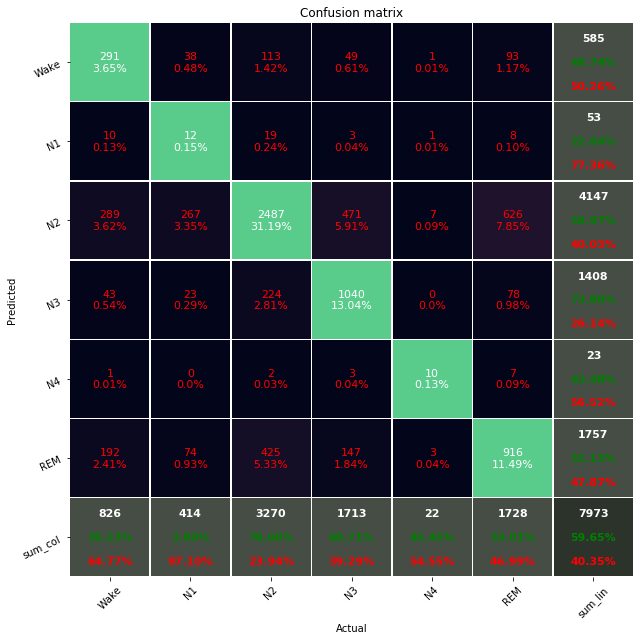

In [26]:
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

predict = rf_predict
plot_confusion_matrix_from_data(test_labels, predict, columns=['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])

In [61]:
import joblib

filename = 'random_forrest_model.sav'
joblib.dump(forest_reg, filename)

['random_forrest_model.sav']

In [65]:
loaded_model = joblib.load(filename)
rf_predict = loaded_model.predict(test_data)

In [66]:
rf_acore = accuracy_score(test_labels, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))

Accuracy = 90.53 %


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30, 40, 45], 'max_features': [1, 2, 3, 4, 5]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 5]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(train_data, train_labels.values.ravel())
grid_search.best_params_

{'max_features': 4, 'n_estimators': 45}

In [28]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
train_data.shape

(35878, 7)

In [29]:
# Embedding
max_features = 30000
maxlen = 5
embedding_size = 128

# Convolution
kernel_size = 3
filters = 128
pool_size = 2

# LSTM
lstm_output_size = 60

# Training
batch_size = 60
epochs = 10

In [15]:
# model = Sequential()
# # model.add(Embedding(max_features, embedding_size, input_length=maxlen))
# # model.add(Dropout(0.25))
# # model.add(Conv1D(filters,
# #                  kernel_size,
# #                  padding='valid',
# #                  activation='relu',
# #                  strides=2))
# # model.add(MaxPooling1D(pool_size=pool_size))

# model.add(LSTM(units=128,
#                input_shape=train_data[0].shape, return_sequences = True))
# model.add(Dropout(0.25))
# model.add(LSTM(units=128, activation='relu',
#                input_shape=train_data[0].shape))
# # model.add(LSTM(units=256, activation='relu', input_shape=(1,7)))
# # model.add(Dropout(0.25))
# # model.add(LSTM(units=512, activation='relu'))
# model.add(Dense(3, activation='relu'))
# model.add(Activation('softmax'))

In [30]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim = 5))
model.add(Dense(2048, activation='relu'))
# model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

W0218 15:47:09.872733 139880070223680 deprecation.py:506] From /home/isuru/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 31892 samples, validate on 7973 samples
W0218 15:47:22.999428 139880070223680 deprecation.py:323] From /home/isuru/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
31892/31892 [==============================] - 26s 815us/sample - loss: 1.3716 - acc: 0.4138 - val_loss: 1.3487 - val_acc: 0.4101
Epoch 2/10
31892/31892 [==============================] - 27s 854us/sample - loss: 1.3382 - acc: 0.4142 - val_loss: 1.3371 - val_acc: 0.4101
Epoch 3/10
31892/31892 [==============================] - 27s 843us/sample - loss: 1.3208 - acc: 0.4160 - val_loss: 1.3259 - val_acc: 0.4254
Epoch 4/10
31892/31892 [==============================] - 27s 849us/sample - loss: 1.3094 - acc: 0.4320 - val_loss: 1.3132 - val_acc: 0.4332
Epoch 5/10

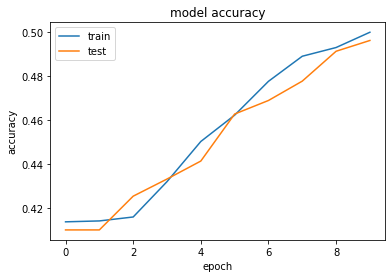

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sn

# y_pred = model.predict(test_data)

# test_labels = test_labels.astype('int32')

# confusion_matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))

# df_cm = pd.DataFrame(confusion_matrix, index = ['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'],
#                   columns = ['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True)

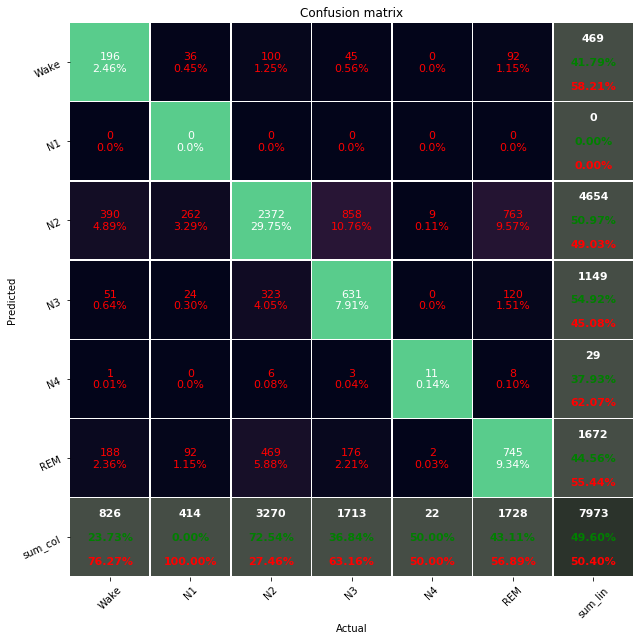

In [34]:
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

predict = model.predict(test_data)
plot_confusion_matrix_from_data(test_labels, predict.argmax(axis=1), columns=['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])

In [220]:
from sklearn.svm import SVC

In [221]:
svc_clf = SVC()
svc_clf.fit(train_data, train_labels)
svc_clf_predict = svc_clf.predict(test_data)
svc_clf_acore_1 = accuracy_score(test_labels, svc_clf_predict)
svc_clf_acore_1 #Accuracy For without setting any hiperparameter manually
print('Accuracy = {:.2f} %'.format(svc_clf_acore_1*100))

/home/isuru/.conda/envs/maritime_surveillance/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy = 89.77 %


In [201]:
q = confusion_matrix(test_labels, svc_clf_predict)

In [15]:
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

In [445]:
from sklearn.neural_network import MLPClassifier

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=13, max_iter= 500, random_state=9)


clf.fit(train_data, train_labels)

pred = clf.predict(test_data)

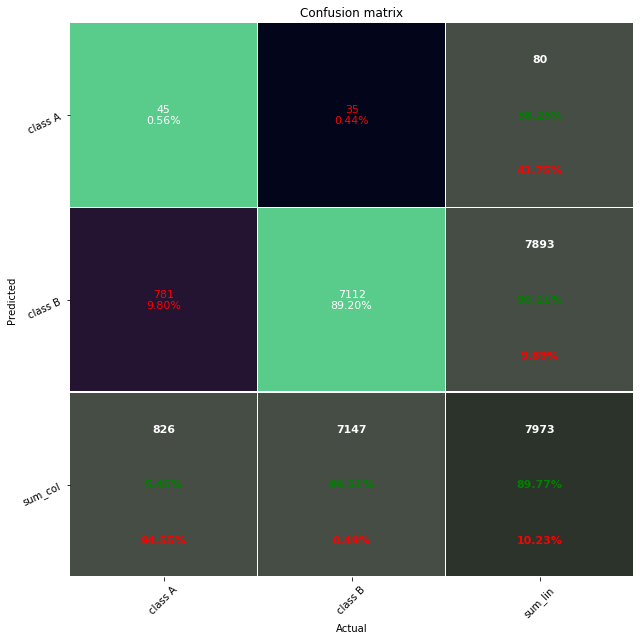

NameError: name 'pred' is not defined

In [222]:
plot_confusion_matrix_from_data(test_labels, svc_clf_predict)
score = accuracy_score(test_labels, pred)
print('Accuracy = {:.2f} %'.format(score*100))

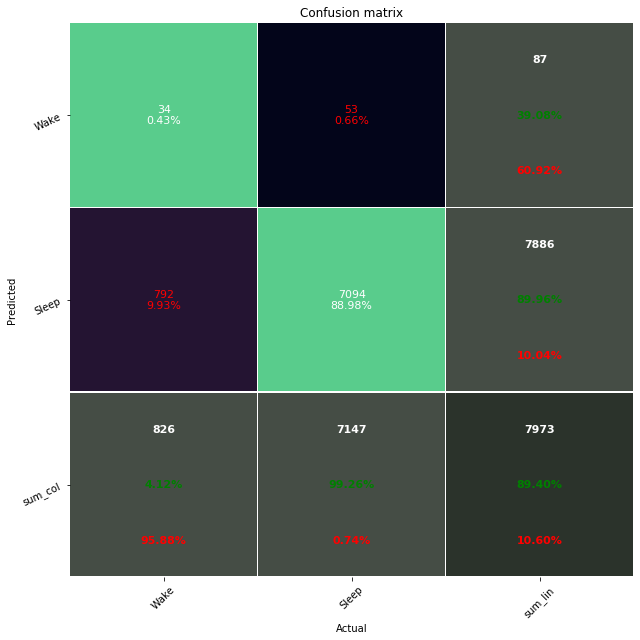

In [229]:
from sklearn.linear_model import SGDClassifier
lin_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=850)
lin_clf.fit(train_data, train_labels)
predict = lin_clf.predict(test_data)
plot_confusion_matrix_from_data(test_labels, predict, columns=['Wake', 'Sleep'])